<a href="https://www.kaggle.com/code/rajattomar132/eda-and-visualization-on-squid-game-tweets?scriptVersionId=116952551" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<br>
<br>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color:#1DA1F2 ; color :#FFFFFF; border-radius: 5px 5px; padding:10px;text-align:center; font-weight: bold">Exploratory Data Analysis And Visualization on Squid Game Tweets</h2> 
<br> 
<br>

<div class="Column">
  <div class="row">
    <img src="https://i.postimg.cc/HxhJ902h/60f5172816321e9428ac1ede-twitter.gif" alt="Snow" style="width:100%">
  </div>

# **Introduction**

**Squid Game (Korean: 오징어 게임; RR: Ojing-eo Geim) is a South Korean survival drama television series created by Hwang Dong-hyuk for Netflix.Its cast includes Lee Jung-jae, Park Hae-soo, Wi Ha-joon, HoYeon Jung, O Yeong-su, Heo Sung-tae, Anupam Tripathi, and Kim Joo-ryoung.**

**The series revolves around a contest where 456 players, all of whom are in deep financial debt, risk their lives to play a series of deadly children's games for the chance to win a ₩45.6 billion (US$38 million, €33 million, or GB£29 million as of broadcast) prize. The title of the series draws from a similarly named Korean children's game.**

<div class="Column">
  <div class="row">
    <img src="https://media.npr.org/assets/img/2021/10/15/squidgame_unit_101_577_wide-feafa98c140a6d814d3a600a52f75535bf1a2df4-s900-c85.webp" alt="Snow" style="width:100%">
  </div>

# **Importing the necessary libraries**:

In [1]:
import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams
from textblob import TextBlob
%matplotlib inline 
import missingno as mno

import re
from collections import Counter

import nltk
from nltk.corpus import stopwords

import requests
import json

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path
              .join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/squid-game-netflix-twitter-data/tweets_v8.csv


# **Loading Dataset**

In [2]:
twitter_data = pd.read_csv("../input/squid-game-netflix-twitter-data/tweets_v8.csv")


# **Let's take a quick overview of how the data looks!**:

In [3]:
# Examining Data
twitter_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [4]:
# Examining Data
twitter_data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
80014,Sale X Low,USA,"Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
80015,RevAAA,NaN,Review Anything Anyone Anywhere,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
80016,Omo K-Pop News,NaN,OMO K-Pop\nNews and Updates,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False
80017,🎃Pumpkin💀Queen 🕸,Halloweentown 🎃,Creator of Stuff | Horror fan | Traveler | Bad...,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False
80018,levi do lay,NaN,NaN,2020-06-17 11:55:56+00:00,16310,14368,108325,False,2021-10-28 13:44:38+00:00,@venancio_taylor @tracklist cala a boca swifte...,Twitter for iPhone,False


In [5]:
print("In this dataset there are {} rows and {} columns in the dataset.".format(twitter_data.shape[0],twitter_data.shape[1]))

In this dataset there are 80019 rows and 12 columns in the dataset.


In [6]:
# Examining statistics
twitter_data.describe()

,user_followers,user_friends,user_favourites
count,8.001900e+04,8.001900e+04,8.001900e+04
mean,1.794587e+04,1.071020e+03,1.796449e+04
std,2.451159e+05,6.751348e+03,4.850358e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.180000e+02,4.420000e+02
50%,2.910000e+02,3.930000e+02,3.028000e+03
75%,1.183000e+03,9.860000e+02,1.494000e+04
max,1.684642e+07,1.211576e+06,1.144792e+06


In [7]:
#let's get some information about the data types of our dataset by executing the code binfo()
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


<AxesSubplot:>

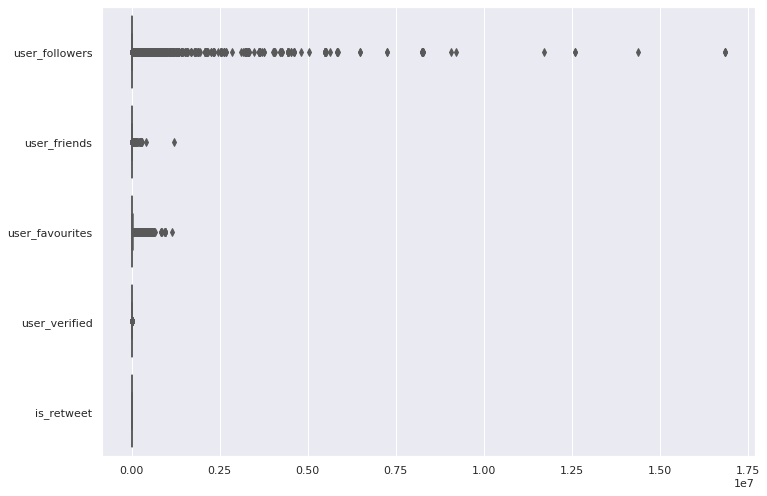

In [8]:
##The below box plot also shows how the values are distributed for both int64 and bool variable type
sns.boxplot(data=twitter_data, orient="h", palette="Set2")

# **Missing Values:**

<AxesSubplot:>

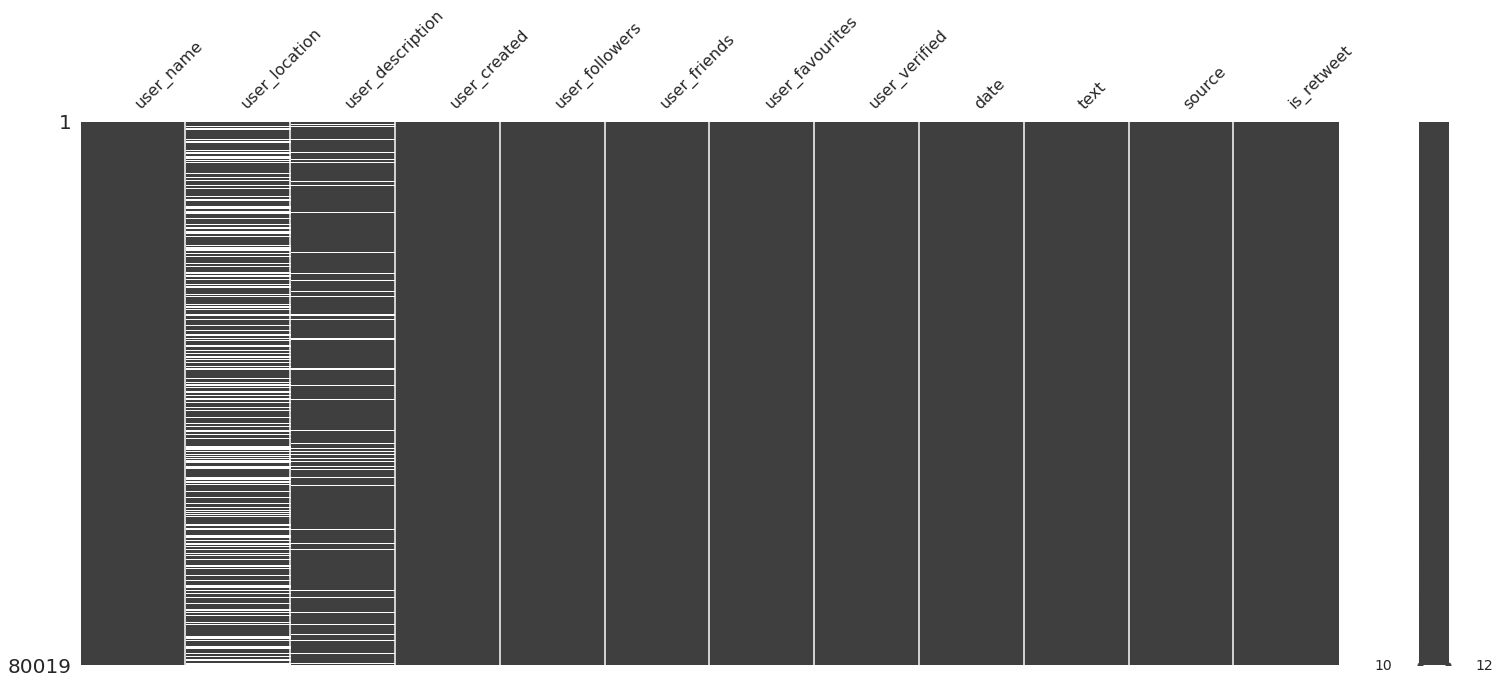

In [9]:
#Let's find out about the missing values in the dataset by executing the code below:
mno.matrix(twitter_data)

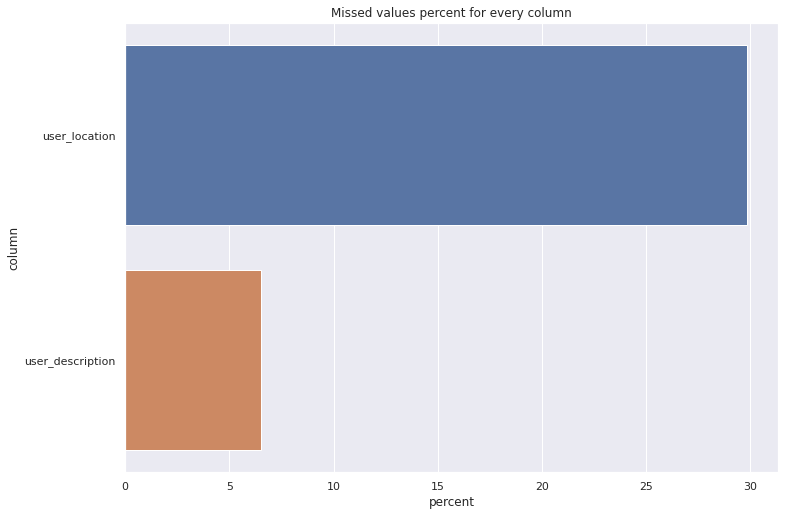

In [10]:
missed = pd.DataFrame()
missed['column'] = twitter_data.columns

missed['percent'] = [round(100* twitter_data[col].isnull().sum() / len(twitter_data), 2) for col in twitter_data.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal'
).set_title('Missed values percent for every column')

In [11]:
twitter_data.isna().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

# Observation:
* **The above barplot shows us that there are only three columns with missing values.**
* **Percentage of missing values are also shown in the plot.**
* **We can see that there is a lot of missing data in user_location, description. And very few user_name are missing.**

# Reasons for missing values!

* **Sometimes a user doesnt add his/her description in the bio and also user make a tweet without any user_location !**
* **But it's very strange of having missing value in user_name. I think it is a data collection error because no account can exist without user_name.**

In [12]:
#converting date column to date format
twitter_data['date'] = pd.to_datetime(twitter_data['date']).dt.date
twitter_data.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06,"The two first games, players were killed by th...",Twitter Web App,False


# **Features exploration**

# **Most frequent values**

In [13]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [14]:
most_frequent_values(twitter_data)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
Total,80015,56149,74808,80019,80019,80019,80019,80019,80019,80019,80019,80019
Most frequent item,Sale X Low,"Los Angeles, CA","Sale X Low, the cheapest low price online stor...",2021-04-03 20:49:35+00:00,0,0,0,False,2021-10-06,Finally watching #SquidGame,Twitter for iPhone,False
Frequence,395,902,395,395,1410,849,1141,76718,10381,15,31520,80019
Percent from total,0.494,1.606,0.528,0.494,1.762,1.061,1.426,95.875,12.973,0.019,39.391,100.0


# **Let's Look into the unique values**


In [15]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    tt['Percentage']=tt['Uniques']/tt['Total']
    return(np.transpose(tt))

In [16]:
unique_values(twitter_data)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
Total,80015.000000,56149.000000,74808.000000,80019.000000,80019.000000,80019.000000,80019.000000,80019.000000,80019.00000,80019.000000,80019.000000,80019.000000
Uniques,54633.000000,18235.000000,52765.000000,56408.000000,10098.000000,5497.000000,25703.000000,2.000000,20.00000,75181.000000,260.000000,1.000000
Percentage,0.682784,0.324761,0.705339,0.704933,0.126195,0.068696,0.321211,0.000025,0.00025,0.939539,0.003249,0.000012


# **Unique values in each column**

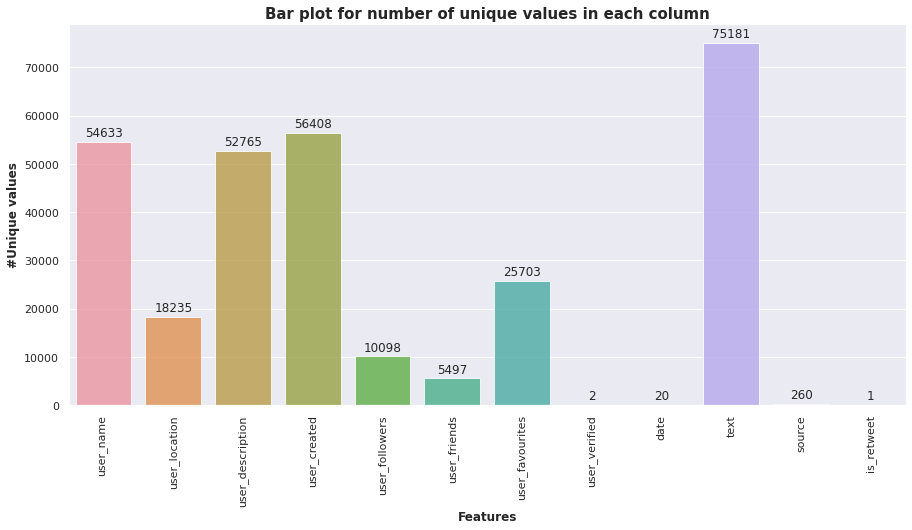

In [17]:
unique_df = pd.DataFrame()
unique_df['Features'] = twitter_data.columns
unique=[]
for i in twitter_data.columns:
    unique.append(twitter_data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**Nearly 68% and 70% of the user name,and user description are unique**

# **Top50 users**

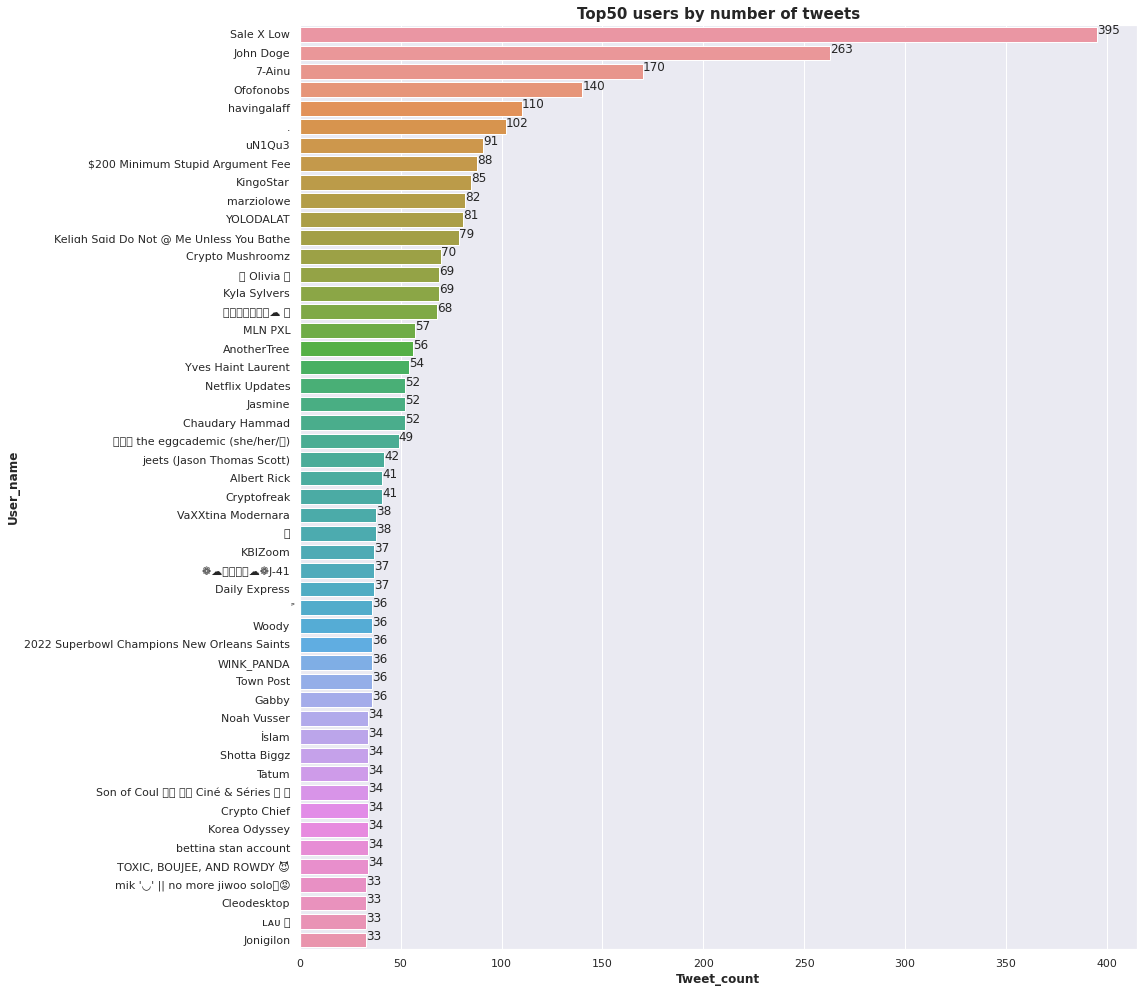

In [18]:
twitter_data_username_count = twitter_data['user_name'].value_counts().reset_index().rename(columns={
    'user_name':'tweet_count','index':'user_name'})

plt.figure(figsize=(15, 17))
sns.barplot(y='user_name',x='tweet_count',data=twitter_data_username_count.head(50))
y=twitter_data_username_count['tweet_count'].head(50)
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top50 users by number of tweets',weight='bold', size=15)
plt.ylabel('User_name', size=12, weight='bold')
plt.xlabel('Tweet_count', size=12, weight='bold')
plt.show()

# **Visulizing Tweet Count vs Location**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Los Angeles, CA'),
  Text(1, 0, 'London, England'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'India'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'London'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'New York, NY'),
  Text(8, 0, 'Canada'),
  Text(9, 0, 'England, United Kingdom'),
  Text(10, 0, 'Dubai, United Arab Emirates'),
  Text(11, 0, 'Atlanta, GA'),
  Text(12, 0, 'California, USA'),
  Text(13, 0, 'New York, USA'),
  Text(14, 0, 'Mumbai, India'),
  Text(15, 0, 'Chicago, IL'),
  Text(16, 0, 'UK'),
  Text(17, 0, 'Brooklyn, NY'),
  Text(18, 0, 'Australia'),
  Text(19, 0, 'Washington, DC')])

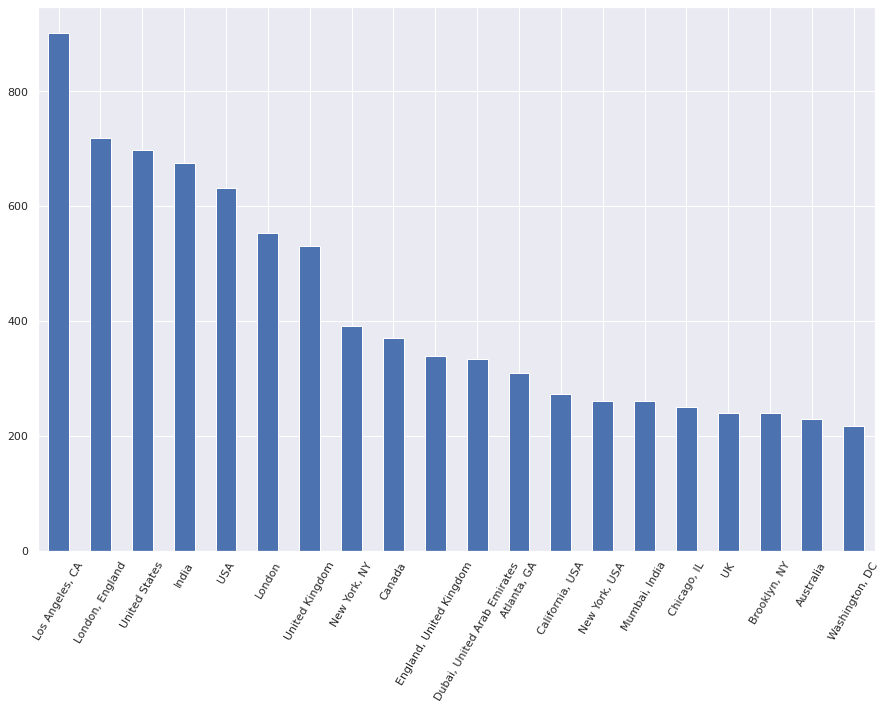

In [19]:
plt.figure(figsize=(15,10))
twitter_data['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

# **Twitter tweets source distribution**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Twitter for iPhone'),
  Text(1, 0, 'Twitter for Android'),
  Text(2, 0, 'Twitter Web App'),
  Text(3, 0, 'Twitter for iPad'),
  Text(4, 0, 'TweetDeck'),
  Text(5, 0, 'Instagram')])

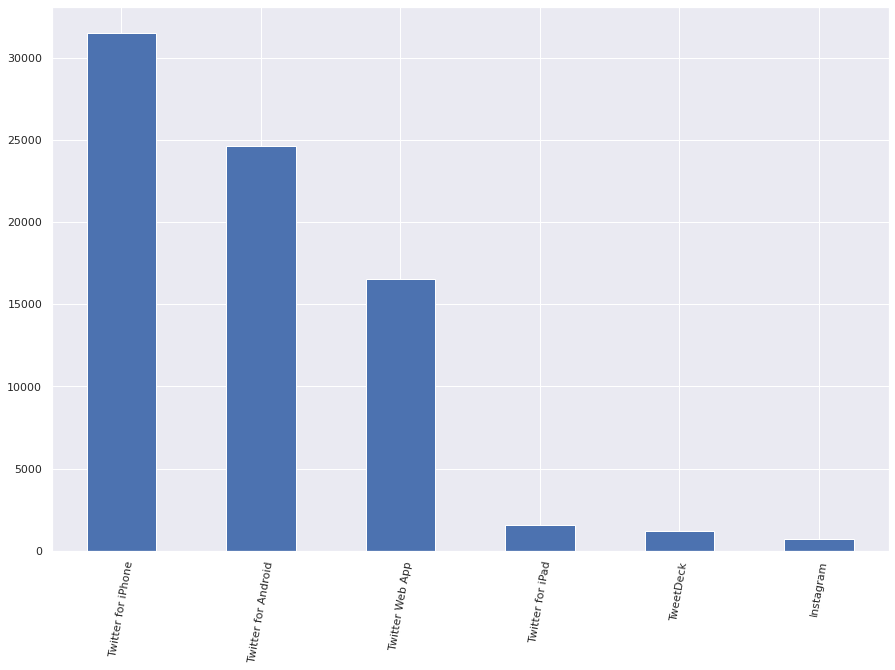

In [20]:
plt.figure(figsize=(15,10))
twitter_data['source'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=80)

# **Users created year by year**

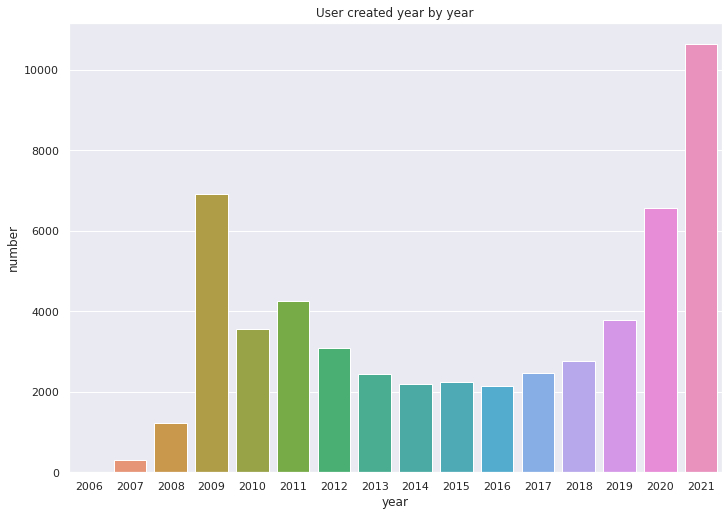

In [21]:
twitter_data['Timestamp'] = pd.to_datetime(twitter_data.user_created, format="%d-%m-%Y %H:%M", errors='coerce')
mask = twitter_data.Timestamp.isnull()
twitter_data.loc[mask, 'Timestamp'] = pd.to_datetime(twitter_data[mask]['user_created'], format='%Y-%m-%d %H:%M:%S',
                                             errors='coerce')
twitter_data['year_created'] = twitter_data['Timestamp'].dt.year
data = twitter_data.drop_duplicates(subset='user_name', keep="first")
data = data[data['year_created']>1970]
data = data['year_created'].value_counts().reset_index()
data.columns = ['year', 'number']

fig = sns.barplot( 
    x=data["year"].astype(int), 
    y=data["number"], 
    orientation='vertical'
    #title='', 
).set_title('User created year by year')

* **2021 has the highest number of users followed by the year 2009.**
* **After 2009 it gradually decrease but from 2019 it increase exponential.**

# **Timestamp Analysis of tweets:**

In [22]:
twitter_data['tweet_date']=pd.to_datetime(twitter_data['date'],errors='coerce').dt.date
tweet_date=twitter_data['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

fig=go.Figure(go.Scatter(x=tweet_date['date'],
              y=tweet_date['count'],
              mode='markers+lines',
              name="Submissions",
              marker_color='dodgerblue'))

fig.update_layout(
title_text='Tweets per Day : ({} - {})'.format(twitter_data['tweet_date'].sort_values()[0]#.strftime("%d/%m/%Y"),
,twitter_data['tweet_date'].sort_values().iloc[-1]#.strftime("%d/%m/%Y"))
,template="plotly_dark",title_x=0.5))

fig.show()

In [23]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# **Text wordcloauds**

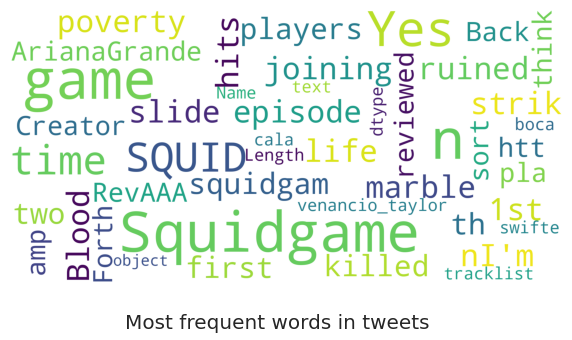

In [24]:
show_wordcloud(twitter_data['text'], title = 'Most frequent words in tweets')

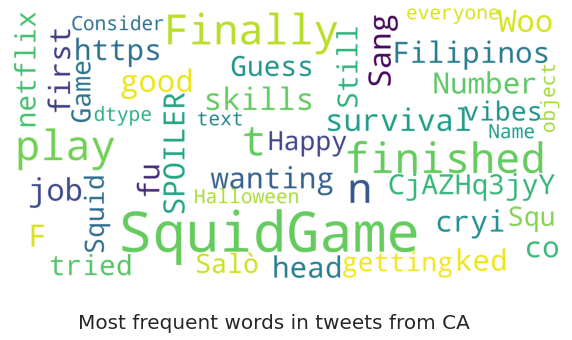

In [25]:
CA_df = twitter_data.loc[twitter_data.user_location=="CA"]
show_wordcloud(CA_df['text'], title = 'Most frequent words in tweets from CA ')

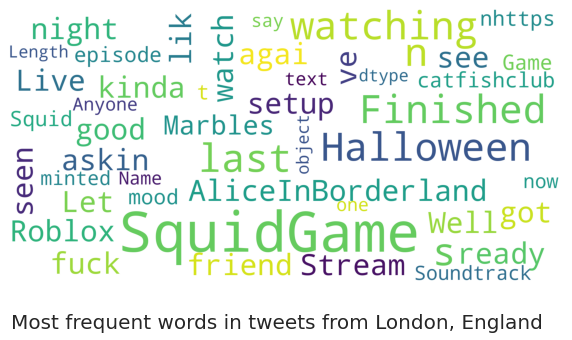

In [26]:
England_df =  twitter_data.loc[ twitter_data.user_location=="England"]
show_wordcloud(England_df['text'], title = 'Most frequent words in tweets from London, England')

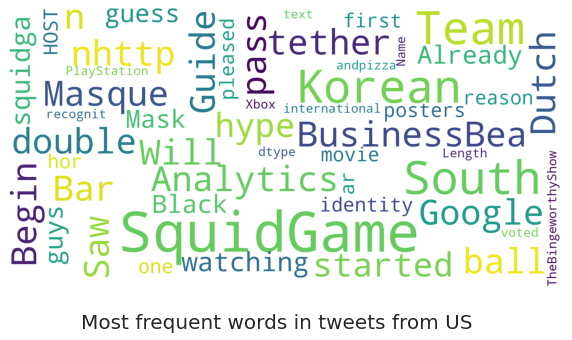

In [27]:
us_df = twitter_data.loc[twitter_data.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Most frequent words in tweets from US')